In [2]:
# !pip install nba_api

In [3]:
def one_dict(lis):
    keys = lis[0].keys()
    out = {key: [] for key in keys}
    for l in lis:
        for key, value in l.items():
            out[key].append(value)
    return out

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

lis = {'name':['mumbai indians', 'chennai super kings', 'Kolkata knight riders', 'Rajasthan Royals'], 'cups':[4,3,2,1]}
lis = pd.DataFrame(lis)
lis

,name,cups
0,mumbai indians,4
1,chennai super kings,3
2,Kolkata knight riders,2
3,Rajasthan Royals,1


In [8]:
lis.shape

(4, 2)

In [9]:
lis.mean()

cups    2.5
dtype: float64

## Rest APIs

In [22]:
from nba_api.stats.static import teams

nba_teams = teams.get_teams()
nba_teams[29]

{'id': 1610612766,
 'full_name': 'Charlotte Hornets',
 'abbreviation': 'CHA',
 'nickname': 'Hornets',
 'city': 'Charlotte',
 'state': 'North Carolina',
 'year_founded': 1988}

In [28]:
dict_nba_team = one_dict(nba_teams)
df = pd.DataFrame(dict_nba_team)
df.head()

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Atlanta,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


In [29]:
df_kings = df[df["nickname"] == 'Kings']
df_kings

,id,full_name,abbreviation,nickname,city,state,year_founded
21,1610612758,Sacramento Kings,SAC,Kings,Sacramento,California,1948


In [35]:
id_df_kings = df_kings[['id']].values[0][0]
id_df_kings

1610612758

In [39]:
from nba_api.stats.endpoints import leaguegamefinder

gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id_df_kings)
gamefinder.get_json()

'{"resource": "leaguegamefinderparameters", "parameters": {"PlayerOrTeam": "T", "LeagueID": null, "Season": null, "SeasonType": null, "TeamID": "1610612758", "VsTeamID": null, "PlayerID": null, "GameID": null, "Outcome": null, "Location": null, "DateFrom": null, "DateTo": null, "VsConference": null, "VsDivision": null, "Conference": null, "Division": null, "DraftYear": null, "DraftNumber": null, "DraftRound": null, "DraftTeamID": null, "RookieYear": null, "YearsExperience": null, "SeasonSegment": null, "PORound": null, "StarterBench": null, "GtPTS": null, "GtREB": null, "GtAST": null, "GtSTL": null, "GtBLK": null, "GtOREB": null, "GtDREB": null, "GtDD": null, "GtTD": null, "GtMINUTES": null, "GtTOV": null, "GtPF": null, "GtFGM": null, "GtFGA": null, "GtFG_PCT": null, "GtFTM": null, "GtFTA": null, "GtFT_PCT": null, "GtFG3M": null, "GtFG3A": null, "GtFG3_PCT": null, "LtPTS": null, "LtREB": null, "LtAST": null, "LtSTL": null, "LtBLK": null, "LtOREB": null, "LtDREB": null, "LtDD": null, "L

In [40]:
games = gamefinder.get_data_frames()[0]
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22019,1610612758,SAC,Sacramento Kings,0021900956,2020-03-08,SAC vs. TOR,L,240,113,...,0.913,10.0,40.0,50.0,24,5,7,11,22,-5.0
1,22019,1610612758,SAC,Sacramento Kings,0021900945,2020-03-07,SAC @ POR,W,241,123,...,0.870,11.0,36.0,47.0,30,9,3,14,23,12.0
2,22019,1610612758,SAC,Sacramento Kings,0021900928,2020-03-05,SAC vs. PHI,L,240,108,...,0.722,4.0,33.0,37.0,23,7,4,17,21,-14.8
3,22019,1610612758,SAC,Sacramento Kings,0021900916,2020-03-03,SAC vs. WAS,W,240,133,...,0.833,8.0,34.0,42.0,23,13,2,15,24,7.0
4,22019,1610612758,SAC,Sacramento Kings,0021900899,2020-03-01,SAC vs. DET,W,240,106,...,0.885,17.0,34.0,51.0,18,8,7,10,20,6.0


In [48]:
games_home =games [games['MATCHUP']=='SAC vs. TOR']
games_away =games [games['MATCHUP']=='SAC @ TOR']
games_home.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22019,1610612758,SAC,Sacramento Kings,0021900956,2020-03-08,SAC vs. TOR,L,240,113,...,0.913,10.0,40.0,50.0,24,5,7,11,22,-5.0
148,22018,1610612758,SAC,Sacramento Kings,0021800161,2018-11-07,SAC vs. TOR,L,239,105,...,0.722,6.0,25.0,31.0,27,10,5,15,26,-9.0
229,22017,1610612758,SAC,Sacramento Kings,0021700385,2017-12-10,SAC vs. TOR,L,239,87,...,0.500,7.0,35.0,42.0,15,7,6,21,17,-15.0
335,22016,1610612758,SAC,Sacramento Kings,0021600196,2016-11-20,SAC vs. TOR,W,238,102,...,0.760,4.0,33.0,37.0,26,8,8,13,18,3.0
431,22015,1610612758,SAC,Sacramento Kings,0021500150,2015-11-15,SAC vs. TOR,W,239,107,...,0.792,9.0,33.0,42.0,23,8,5,19,19,6.0


In [55]:
print(games_home.mean()['PLUS_MINUS'])
print(games_away.mean()['PLUS_MINUS'])

6.76
-6.535714285714286


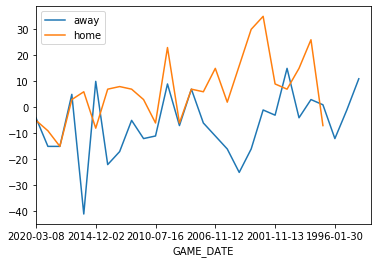

In [57]:
fig, ax = plt.subplots()

games_away.plot(x = 'GAME_DATE',y = 'PLUS_MINUS', ax = ax)
games_home.plot(x = 'GAME_DATE',y = 'PLUS_MINUS', ax = ax)
ax.legend(["away", "home"])
plt.show()